# **Scikit Learn**
Website Link:
https://scikit-learn.org/stable/index.html

Tutorial for beginner:
https://www.tutorialspoint.com/scikit_learn/scikit_learn_modelling_process.html

**Menginstall Sci-Kit Learn**

Jika menggunakan Command Prompt pip install -U scikit-learn

Jika menggunakan Anaconda Prompt conda install -c conda-forge scikit-learn

**Mengecek Versi Sci-Kit Learn**

Jika menggunakan Command Prompt **python -m pip show scikit-learn** -> Untuk melihat versi dan lokasi Sci-Kit Learn diinstall

Jika menggunakan Anaconda Prompt **conda list scikit-learn** -> Untuk melihat versi Sci-Kit Learn yang sudah diinstall

# **Dataset Loading**
Sebagai salah satu contoh demo untuk Scikit Learn, digunakan dataset klasifikasi bunga berdasarkan iris bunga. Pada dataset ini terdapat 4 fitur:
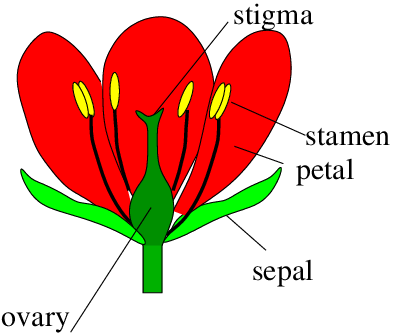
* Sepal Length (cm)
* Sepal Width (cm)
* Petal Length (cm)
* Petal Width (cm)

Dengan 3 target klasifikasi bunga:
* Setosa (0)
* Versicolor (1)
* Virginica (2)

In [1]:
# Load Datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


# **Split Dataset**
Dalam berikut ini, dataset bunga akan dibagi menjadi training dan test dataset

In [2]:
# Split into train and test dataset
# 70% Train
# 30% Test

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.3, random_state = 1
)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# **Train Model**
Terdapat beberapa algoritma yang biasa digunakan pada scikit-learn, yaitu: fitting, predicting accuracy, recall

In [3]:
# Import K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
print(y_pred)

# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Providing sample data and the model will make prediction out of that data
# sample = [[4.9, 3., 1.4, 0.2], [4.7, 3.2, 1.3, 0.2]]
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds] 
print("Predictions:", pred_species)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
Accuracy: 0.9777777777777777
Predictions: ['versicolor', 'virginica']


# **Save & Loading Model**
.dump berguna untuk menyimpan hasil training menjadi file model
.load berguna mengload kembali model yang sudah dibuat sebelumnya dengan menggunakan .dump

In [5]:
import joblib
joblib.dump(classifier_knn, 'iris_classifier_knn.joblib')

classifier_knn_load = joblib.load('iris_classifier_knn.joblib')
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn_load.predict(sample)
pred_species = [iris.target_names[p] for p in preds] 
print("Predictions:", pred_species)

Predictions: ['versicolor', 'virginica']


# Beberapa contoh metode lainnya yang bisa digunakan dengan Sci-Kit Learn

Contoh salah satu metode pre-processing untuk normalisasi

In [6]:
import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1)


L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]


In [7]:
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL2 normalized data:\n", data_normalized_l2)


L2 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]


In [8]:
#Decision Tree Classifier

from sklearn import tree
from sklearn.model_selection import train_test_split
X=[[165,19],[175,32],[136,35],[174,65],[141,28],[176,15],[131,32],\
   [166,6],[128,32],[179,10],[136,34],[186,2],[126,25],[176,28],[112,38],\
   [169,9],[171,36],[116,25],[196,25], [196,38], [126,40], [197,20], [150,25],\
   [140,32],[136,35]]
Y=['Man','Woman','Woman','Man','Woman','Man','Woman','Man','Woman','Man','Woman',\
   'Man','Woman','Woman','Woman','Man','Woman','Woman','Man', 'Woman', 'Woman', 'Man', 'Man', 'Woman', 'Woman']
data_feature_names = ['height','length of hair']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
DTclf = tree.DecisionTreeClassifier()
DTclf = DTclf.fit(X,Y)
prediction = DTclf.predict([[135,29]])
print(prediction)

['Woman']


In [9]:
#Menggunakan predict_proba untuk memprediksi probabilitas untuk setiap class

prediction = DTclf.predict_proba([[135,29]])
print(prediction)

[[0. 1.]]
